<a href="https://colab.research.google.com/github/hsh6449/TIL/blob/main/tensor5_23_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [2]:
import numpy as np
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [3]:
import matplotlib.pyplot as plt

`-` 데이터 입력

In [8]:
_X1 = tnp.zeros([6,3])
_X1

<tf.Tensor: shape=(6, 3), dtype=float64, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])>

In [7]:
_X2 = tnp.ones([6,3])
_X2

<tf.Tensor: shape=(6, 3), dtype=float64, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])>

In [12]:
data = tf.concat([_X1,_X2], axis = 1)
data

<tf.Tensor: shape=(6, 6), dtype=float64, numpy=
array([[0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.]])>

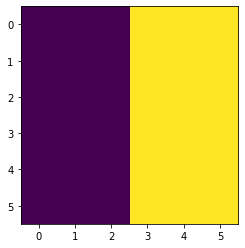

In [11]:
plt.imshow(data)

In [19]:
dt = data.reshape(1,6,6,1)

`-` conv layers 생성

In [16]:
conv = tf.keras.layers.Conv2D(1,(2,2))

In [20]:
conv(dt)
conv.weights

[<tf.Variable 'conv2d_1/kernel:0' shape=(2, 2, 1, 1) dtype=float32, numpy=
 array([[[[ 0.11027873]],
 
         [[-0.6478313 ]]],
 
 
        [[[-0.2981965 ]],
 
         [[ 0.42219824]]]], dtype=float32)>,
 <tf.Variable 'conv2d_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]

In [23]:
conv.weights[0].shape

TensorShape([2, 2, 1, 1])

In [29]:
w = tnp.array([-1,1,-1,1], dtype= np.float32).reshape(2,2,1,1)

In [30]:
w

<tf.Tensor: shape=(2, 2, 1, 1), dtype=float32, numpy=
array([[[[-1.]],

        [[ 1.]]],


       [[[-1.]],

        [[ 1.]]]], dtype=float32)>

In [31]:
tf.reshape(w,(2,2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.,  1.],
       [-1.,  1.]], dtype=float32)>

In [33]:
b= np.array([0.0],dtype=np.float32)

In [34]:
conv.set_weights([w,b])

In [38]:
print(dt.reshape(1,6,6))
print(conv(dt).reshape(1,5,5))

tf.Tensor(
[[[0. 0. 0. 1. 1. 1.]
  [0. 0. 0. 1. 1. 1.]
  [0. 0. 0. 1. 1. 1.]
  [0. 0. 0. 1. 1. 1.]
  [0. 0. 0. 1. 1. 1.]
  [0. 0. 0. 1. 1. 1.]]], shape=(1, 6, 6), dtype=float64)
tf.Tensor(
[[[0. 0. 2. 0. 0.]
  [0. 0. 2. 0. 0.]
  [0. 0. 2. 0. 0.]
  [0. 0. 2. 0. 0.]
  [0. 0. 2. 0. 0.]]], shape=(1, 5, 5), dtype=float32)
